In [67]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [50]:
df = pd.read_csv('../data/cleaned_data2.csv')

grad % mean:  60.97913907284762
grad % std:  22.390735880307915


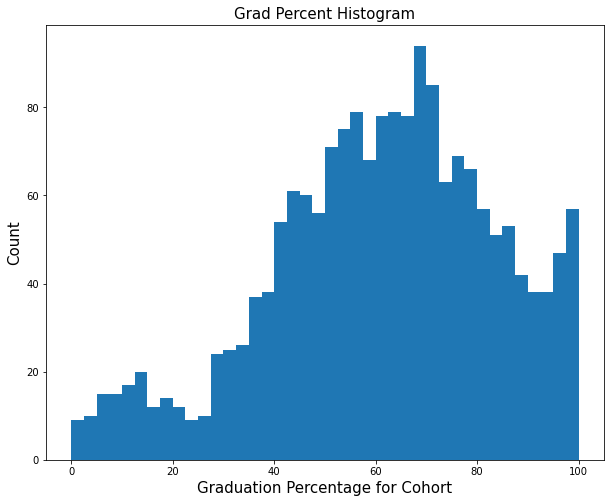

In [57]:
df['Total Grads - % of cohort'].plot.hist(bins = 40, figsize=(10,8))
plt.xlabel('Graduation Percentage for Cohort', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Grad Percent Histogram', fontsize = 15)
print('grad % mean: ',df['Total Grads - % of cohort'].mean())
print('grad % std: ',df['Total Grads - % of cohort'].std())
plt.savefig(f"../Figures/gradperc.png", bbox_inches='tight', dpi=600)

Text(0.5, 1.0, 'Droppout % Histogram')

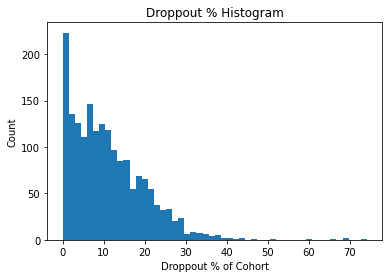

In [10]:
df['Dropped Out - % of cohort'].plot.hist(bins = 50)
plt.xlabel('Droppout % of Cohort')
plt.ylabel('Count')
plt.title('Droppout % Histogram')

Text(0.5, 1.0, 'Total Cohort Histogram')

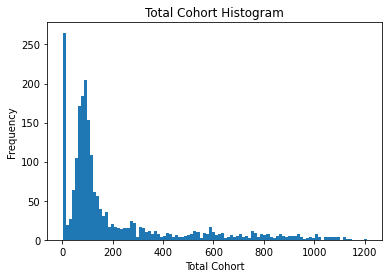

In [11]:
df['Total Cohort'].plot.hist(bins = 100)
plt.xlabel('Total Cohort')
plt.title('Total Cohort Histogram')

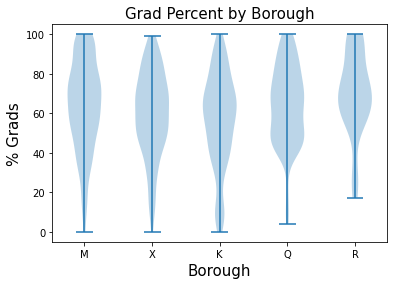

In [19]:
dataset = [df[df['BORO']== b]['Total Grads - % of cohort'].values for b in df['BORO'].unique()]
master = []
for lst in dataset:
    master.append(lst[np.logical_not(np.isnan(lst))])

plt.violinplot(dataset = master)
plt.xticks([1,2,3,4,5],[b for b in df['BORO'].unique()])
plt.ylabel('% Grads', fontsize=15)
plt.xlabel('Borough', fontsize = 15)
plt.title('Grad Percent by Borough', fontsize =15)
plt.show()

In [20]:
df.groupby('BORO')['Total Grads - % of cohort'].agg('mean')

BORO
K    56.742515
M    63.747490
Q    64.089209
R    70.028571
X    59.491503
Name: Total Grads - % of cohort, dtype: float64

In [21]:
df.groupby(['Cohort', 'BORO'])['Total Grads - % of cohort'].agg('mean')

Cohort  BORO
2001    K       48.162500
        M       59.683099
        Q       57.757895
        R       66.577778
        X       50.251351
2002    K       50.364179
        M       59.423684
        Q       59.419512
        R       66.955556
        X       51.748214
2003    K       56.131507
        M       61.389024
        Q       61.774419
        R       69.411111
        X       58.253521
2004    K       58.831818
        M       62.838462
        Q       63.257447
        R       68.488889
        X       60.296703
2005    K       58.332000
        M       65.947959
        Q       66.146154
        R       72.570000
        X       61.364706
2006    K       62.965138
        M       70.524000
        Q       72.224561
        R       75.300000
        X       65.364706
Name: Total Grads - % of cohort, dtype: float64

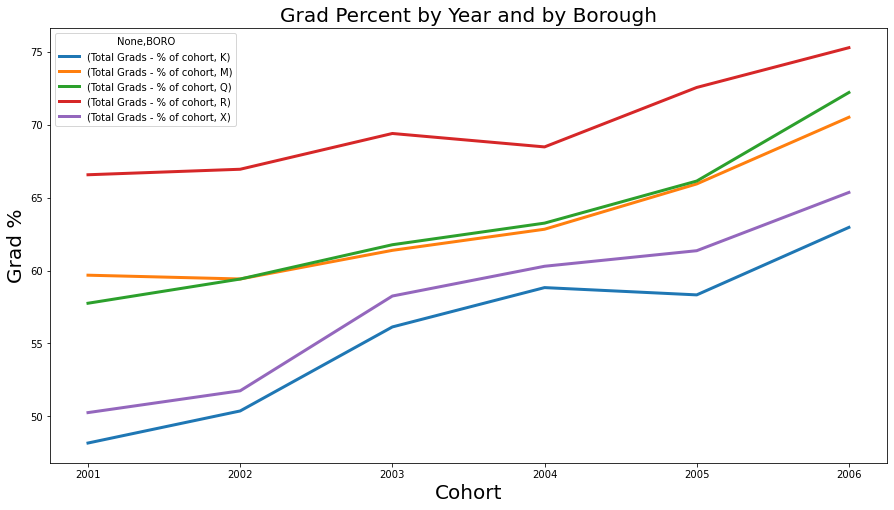

In [22]:
Cohort_Boro = pd.DataFrame(df[['Cohort','BORO', 'Total Grads - % of cohort']].groupby(['Cohort', 'BORO'])\
                           [['BORO', 'Total Grads - % of cohort']].mean().unstack())
Cohort_Boro.plot(figsize = (15,8), linewidth=3)
plt.xlabel('Cohort', fontsize = 20)
plt.ylabel('Grad %', fontsize = 20)
plt.title('Grad Percent by Year and by Borough', fontsize = 20)
plt.show()
#source -https://www.kaggle.com/rgrajan/time-series-exploratory-data-analysis-forecast

In [23]:
print(df[df['Demographic'] == 'Total Cohort'].groupby('Cohort')['Total Grads - % of cohort'].agg('mean'))
df[df['Demographic'] == 'Total Cohort'].groupby('Cohort')['Total Grads - % of cohort'].agg('var')
#data is non-stationary

Cohort
2001    54.672146
2002    55.531325
2003    59.526978
2004    61.263804
2005    62.764088
2006    67.334921
Name: Total Grads - % of cohort, dtype: float64


Cohort
2001    532.196698
2002    530.590305
2003    494.141688
2004    476.464655
2005    477.839095
2006    432.268857
Name: Total Grads - % of cohort, dtype: float64

Text(0.5, 1.0, 'Regents Percent vs Grad Percent')

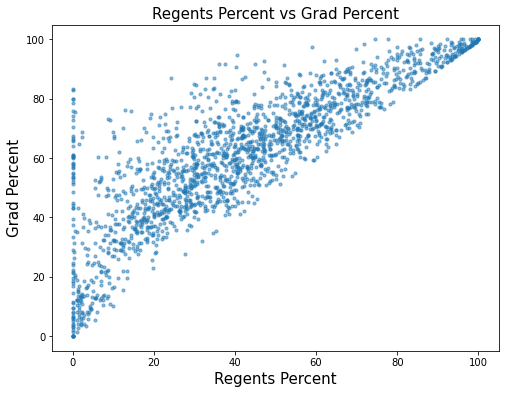

In [24]:
df.plot.scatter('Total Regents - % of cohort', 'Total Grads - % of cohort', s = 10, alpha = .5, figsize = (8,6))
plt.xlabel('Regents Percent', fontsize = 15)
plt.ylabel('Grad Percent', fontsize = 15)
plt.title('Regents Percent vs Grad Percent', fontsize= 15)

In [88]:
df.plot.scatter('Total Regents - % of cohort', 'y', s = 10, alpha = .5, figsize = (8,6), c= 'r'
plt.xlabel('Regents %', fontsize = 15)
plt.ylabel('y (Next Years Graduation Rate)', fontsize = 15)
plt.title('Regents % vs y', fontsize= 15)
#plt.savefig(f"../Figures/regentsvsy.png", bbox_inches='tight', dpi=600)

SyntaxError: invalid syntax (<ipython-input-88-97b196bd9615>, line 2)

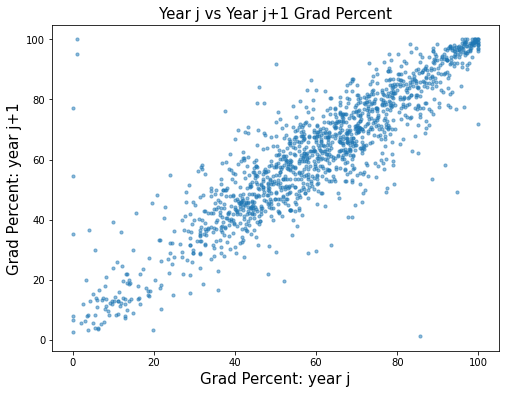

In [59]:
df.plot.scatter('Total Grads - % of cohort', 'y', s = 10, alpha = .5, figsize = (8,6))
plt.xlabel('Grad Percent: year j', fontsize = 15)
plt.ylabel('Grad Percent: year j+1', fontsize = 15)
plt.title('Year j vs Year j+1 Grad Percent', fontsize= 15)
plt.savefig(f"../Figures/jvsjp1.png", bbox_inches='tight', dpi=600)

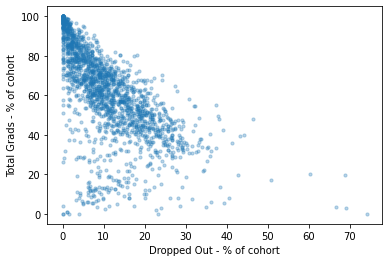

In [27]:
df.plot.scatter('Dropped Out - % of cohort','Total Grads - % of cohort', s = 10, alpha = .3)

In [28]:
scatter_matrix_df = df.drop(['School Name', 'Total Grads - n', \
             'Advanced Regents - % of grads', 'Regents w/o Advanced - % of grads', 'Local - n', 'Local - % of cohort', \
             'Local - % of grads', 'Still Enrolled - n', 'Still Enrolled - % of cohort'], axis = 1)
scatter_matrix_df.columns

Index(['Unnamed: 0', 'Demographic', 'DBN', 'Cohort', 'Total Cohort',
       'Total Grads - % of cohort', 'Total Regents - n',
       'Total Regents - % of cohort', 'Total Regents - % of grads',
       'Advanced Regents - n', 'Advanced Regents - % of cohort',
       'Regents w/o Advanced - n', 'Regents w/o Advanced - % of cohort',
       'Dropped Out - n', 'Dropped Out - % of cohort', 'BORO', 'District',
       'Income', 'y'],
      dtype='object')

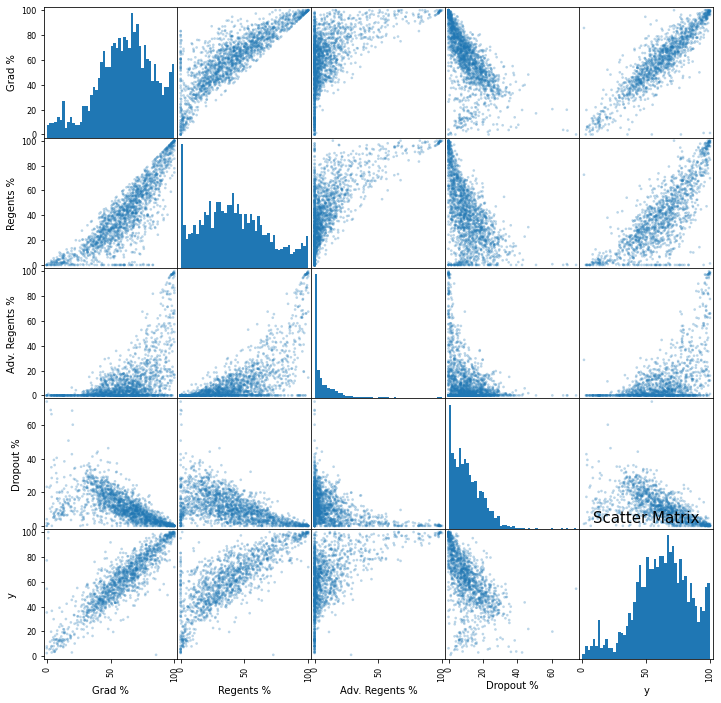

In [58]:
scatter_matrix_df = df.drop(['School Name', 'Total Grads - n', 'Total Regents - % of grads', \
             'Advanced Regents - % of grads', 'Regents w/o Advanced - % of grads', 'Local - n', 'Local - % of cohort', \
             'Local - % of grads', 'Still Enrolled - n', 'Still Enrolled - % of cohort'], axis = 1)
test = scatter_matrix_df.select_dtypes(float)
test = test.rename(columns={'Total Grads - % of cohort': 'Grad %', 'Total Regents - % of cohort': 'Regents %',\
                           'Advanced Regents - % of cohort': 'Adv. Regents %', 'Regents w/o Advanced - % of cohort': \
                            'Non-Adv Regents %', 'Dropped Out - % of cohort': 'Dropout %'}).drop('Non-Adv Regents %', axis = 1)
pd.plotting.scatter_matrix(test, figsize=(12, 12), marker='o',hist_kwds={'bins': 50}, 
                           s=7, alpha=.3)
plt.show()

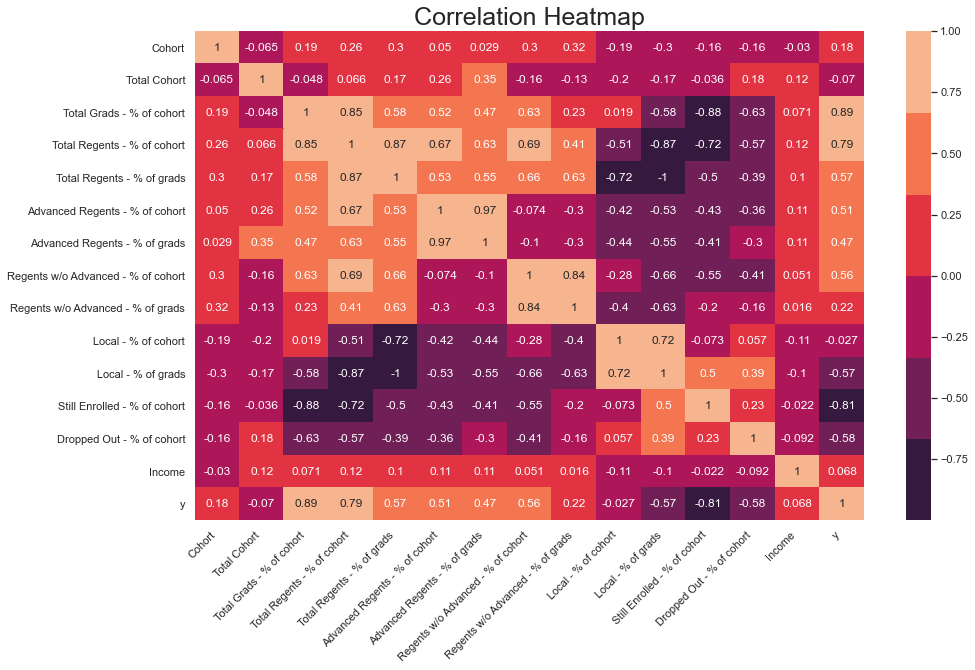

In [85]:
corr = df2.drop('Unnamed: 0', axis=1).corr()
sns.set(rc={'figure.figsize':(15,9)})
cmap = sns.color_palette("rocket")

ax = sns.heatmap(corr,cmap=cmap, annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Heatmap',size= 25)

plt.savefig(f"../Figures/corr-heatmap.png", bbox_inches='tight', dpi=600)

In [51]:
# remove features that won't be used in the model
print(df.shape)
df2 = df.drop(['School Name', 'Demographic', 'DBN', 'District'], axis = 1)
df2 = df2.reset_index(drop=True)
print(df2.shape)

(2088, 28)
(2088, 24)


In [42]:
# calculating iqr and number of outliers where an outlier is defined to be 2 std above or below the mean
for year in sorted(df['Cohort'].unique()):
    if year == 2006:
        continue
    data = df[df['Cohort'] == year]['y']

    print(year)
    print('std: ', np.std(data))
    sorted(data)
    data = list(data.dropna())

    q = np.percentile(data,[25,75])
    iqr = q[1] - q[0]
    print('iqr: ', iqr)
    outliers=[]
    
    threshold=2
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    print('num outliers', len(outliers))
    print('mean', np.mean(data))

2001
std:  22.23719487953265
iqr:  27.775
num outliers 12
mean 55.251694915254234
2002
std:  22.15683281464725
iqr:  30.599999999999994
num outliers 13
mean 59.12490842490842
2003
std:  21.780625598564516
iqr:  28.750000000000007
num outliers 17
mean 60.90218749999999
2004
std:  20.493430859653355
iqr:  26.499999999999986
num outliers 15
mean 63.58649425287356
2005
std:  20.482326544097365
iqr:  25.300000000000004
num outliers 24
mean 67.41935483870968


In [56]:
#CALCULATE MISSING VALUE % BEFORE DROPPING NA
df_temp = df2.drop('y', axis=1)
print('data dimensions:',df_temp.shape)
perc_missing_per_ftr = df_temp.isnull().sum(axis=0)/df_temp.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df_temp[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df_temp.isnull().sum(axis=1)!=0)/df_temp.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (2088, 23)
fraction of missing values in features:
Total Grads - % of cohort             0.132184
Total Regents - % of cohort           0.132184
Total Regents - % of grads            0.135057
Advanced Regents - % of cohort        0.132184
Advanced Regents - % of grads         0.135057
Regents w/o Advanced - % of cohort    0.132184
Regents w/o Advanced - % of grads     0.135057
Local - % of cohort                   0.132184
Local - % of grads                    0.135057
Still Enrolled - % of cohort          0.132184
Dropped Out - % of cohort             0.132184
dtype: float64
data types of the features with missing values:
Total Grads - % of cohort             float64
Total Regents - % of cohort           float64
Total Regents - % of grads            float64
Advanced Regents - % of cohort        float64
Advanced Regents - % of grads         float64
Regents w/o Advanced - % of cohort    float64
Regents w/o Advanced - % of grads     float64
Local - % of cohort           

In [47]:
# schools with less than 20 students don't report data, so we have no features or target variable, only school name
# only option is to drop
df2 = df2.dropna()
df2.shape

(1406, 24)

In [48]:
df2.to_csv('../Data/df_pre_splitting.csv')